# Exploratory Data Analysis

### Load Cleansed Wine Reviews

See [data preparation](wine_review-data_preparation.ipynb) for details on the prepared dataset.

Libraries

In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
wine_df = pd.read_parquet('files/wine_review.parquet.gzip')
wine_df.info()
wine_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100538 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100538 non-null  object 
 1   description     100538 non-null  object 
 2   points          100538 non-null  int64  
 3   price           93522 non-null   float64
 4   taster_name     100538 non-null  object 
 5   title           100538 non-null  object 
 6   variety         100538 non-null  object 
 7   winery          100538 non-null  object 
 8   year            100538 non-null  int64  
 9   wine_style      100538 non-null  object 
 10  type            100538 non-null  object 
 11  quality         100538 non-null  object 
 12  classification  100538 non-null  object 
 13  location        100538 non-null  object 
 14  band            93522 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 12.3+ MB


,country,description,points,price,taster_name,title,variety,winery,year,wine_style,type,quality,classification,location,band
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,light_white,white,medium,Old World,Etna,None
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,medium_red,red,medium,Old World,Douro,popular
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,light_white,white,medium,New World,Oregon,popular
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,aromatic_white,white,medium,New World,Michigan,popular
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,light_red,red,medium,New World,Oregon,luxury


In [4]:
wine_df.nunique()

country               15
description       100517
points                21
price                370
taster_name           20
title             100101
variety               50
winery             14982
year                  18
wine_style             9
type                   5
quality                2
classification         2
location             569
band                   8
dtype: int64

## Univariate Analysis

### Points

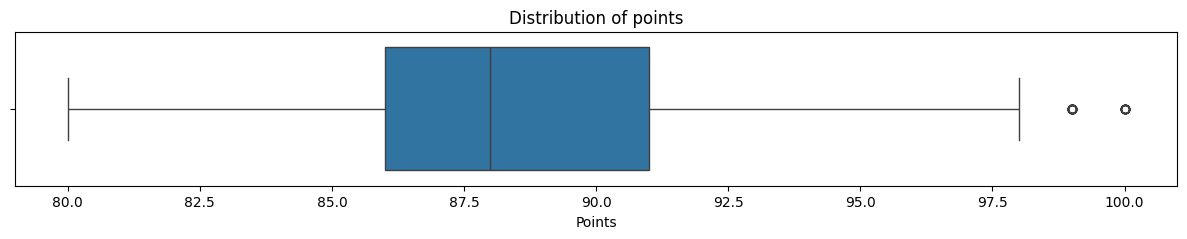

In [5]:
# box plot of points
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='points', orient='h')
ax.set_title('Distribution of points')
ax.set_xlabel('Points')
plt.show()

### Quality

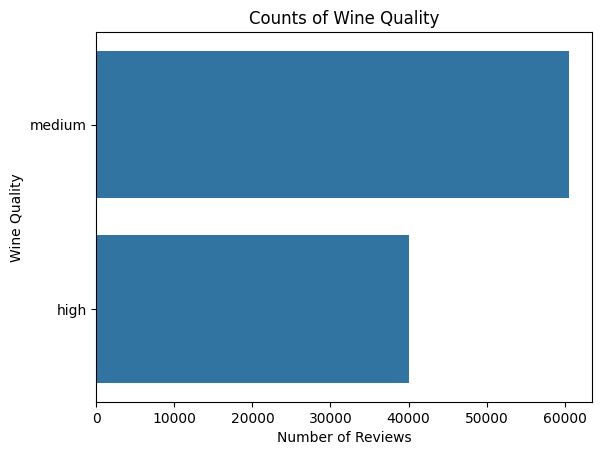

In [6]:
sns.barplot(wine_df.quality.value_counts().sort_values(ascending=False).reset_index(), x='count', y='quality')
plt.title('Counts of Wine Quality')
plt.xlabel('Number of Reviews')
plt.ylabel('Wine Quality')
plt.show()

### Price

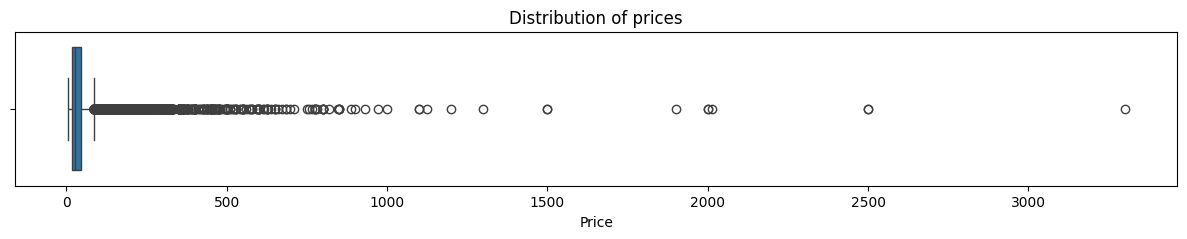

In [7]:
# box plot of price
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='price', orient='h')
ax.set_title('Distribution of prices')
ax.set_xlabel('Price')
plt.show()

### Price Band

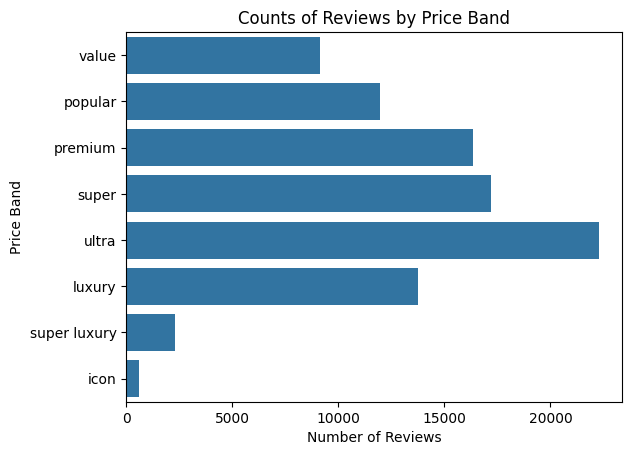

In [8]:
sns.barplot(wine_df['band'].value_counts(), orient='h', order=['value', 'popular', 'premium', 'super', 'ultra', 'luxury', 'super luxury', 'icon'])
plt.title('Counts of Reviews by Price Band')
plt.xlabel('Number of Reviews')
plt.ylabel('Price Band')
plt.show()

### Year

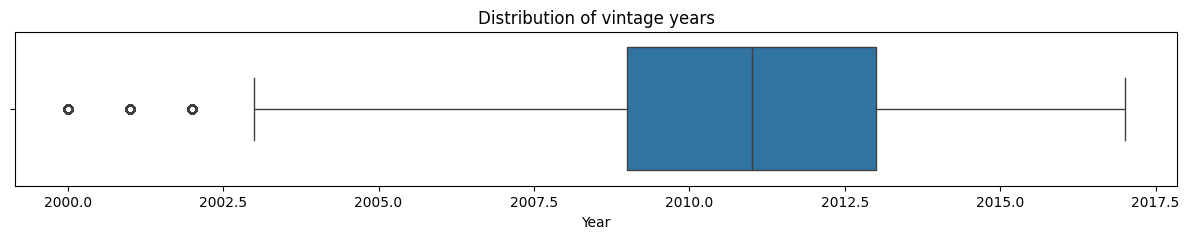

In [9]:
fig, ax = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(wine_df, x='year', orient='h')
ax.set_title('Distribution of vintage years')
ax.set_xlabel('Year')
plt.show()

In [10]:
wine_df.year.describe()

count    100538.000000
mean       2010.756162
std           3.264153
min        2000.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: year, dtype: float64

### Variety

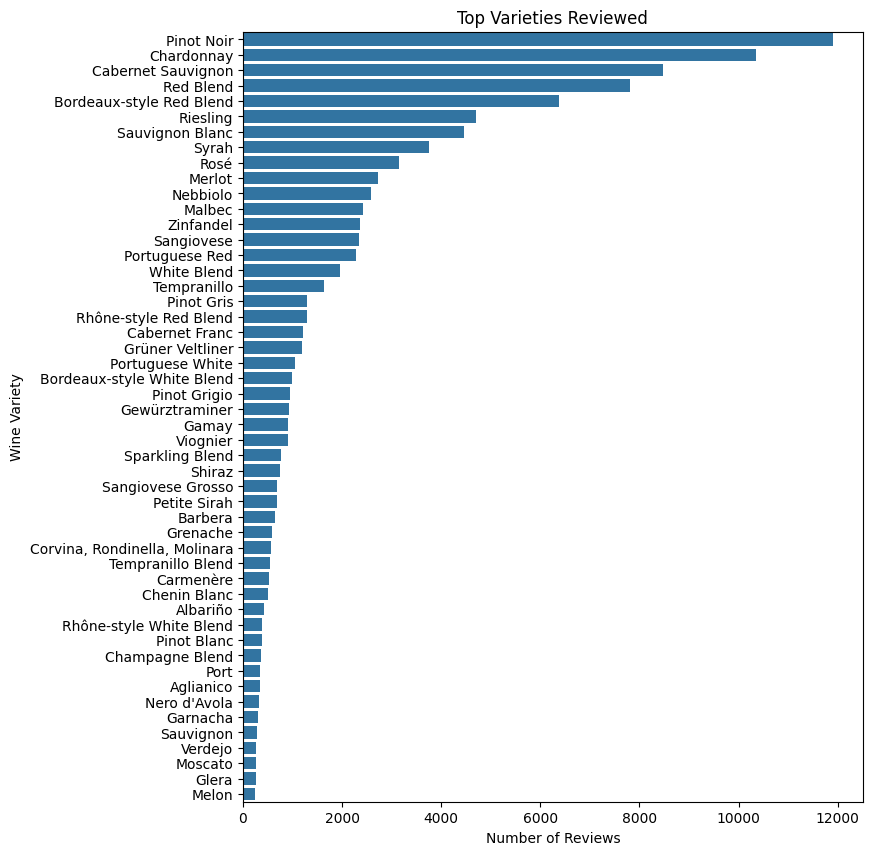

In [11]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(wine_df.variety.value_counts().sort_values(ascending=False).reset_index(), x='count', y='variety')
ax.set_title('Top Varieties Reviewed')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Wine Variety')
plt.show()

### Style

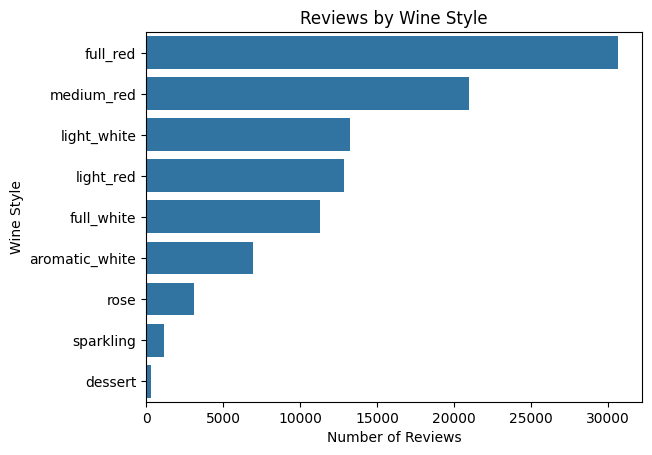

In [12]:
# fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(wine_df.wine_style.value_counts().sort_values(ascending=False).reset_index(), x='count', y='wine_style')
plt.title('Reviews by Wine Style')
plt.xlabel('Number of Reviews')
plt.ylabel('Wine Style')
plt.show()

### Type

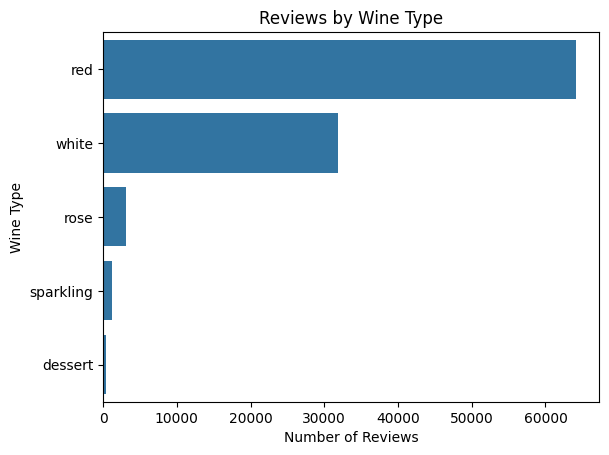

In [13]:
# fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(wine_df.type.value_counts().sort_values(ascending=False).reset_index(), x='count', y='type')
plt.title('Reviews by Wine Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Wine Type')
plt.show()

### Country

In [14]:
reviews_by_country = wine_df.country.value_counts().reset_index().sort_values('count', ascending=False)
reviews_by_country

,country,count
0,US,45840
1,France,17692
2,Italy,13115
3,Spain,4226
4,Portugal,4033
5,Chile,3785
6,Argentina,2988
7,Austria,2183
8,Australia,1828
9,Germany,1789


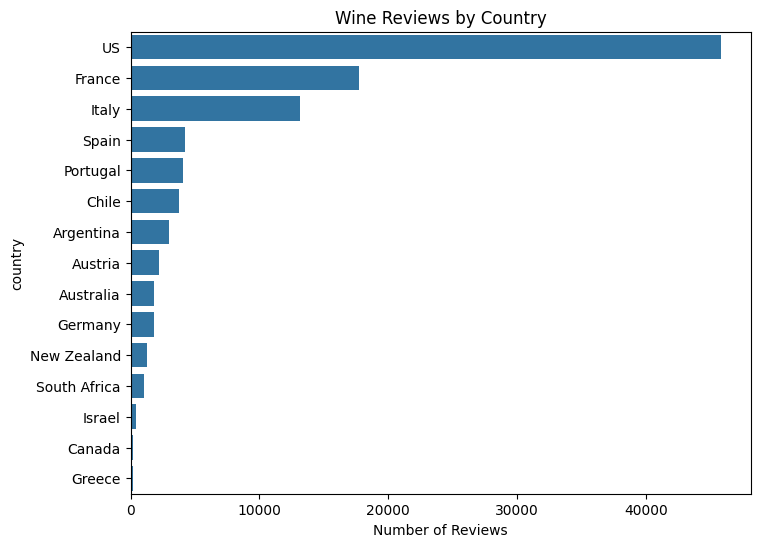

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(reviews_by_country, x='count', y='country')
ax.set_title('Wine Reviews by Country')
ax.set_xlabel('Number of Reviews')
plt.show()

In [16]:
print('Number of wine reviews by country')
fig = px.choropleth(
  reviews_by_country, locations='country', locationmode='country names', 
  color='count', range_color=[reviews_by_country['count'].min(), reviews_by_country['count'].max()],
  title='Number of wine reviews by country'
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Number of wine reviews by country


### Old world vs New World Wine Classification

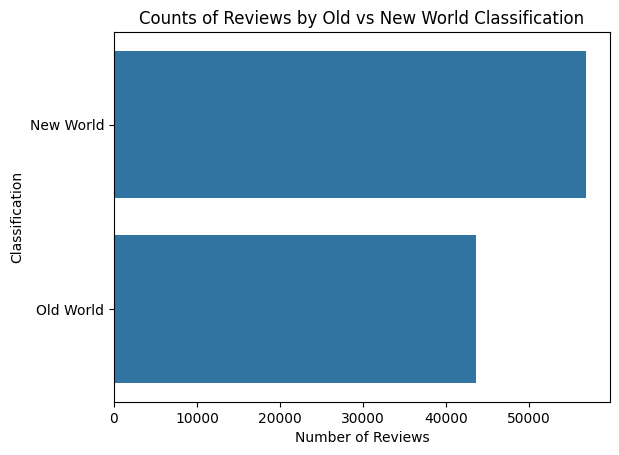

In [17]:
sns.barplot(wine_df.classification.value_counts(), orient='h')
plt.title('Counts of Reviews by Old vs New World Classification')
plt.xlabel('Number of Reviews')
plt.ylabel('Classification')
plt.show()

### Taster

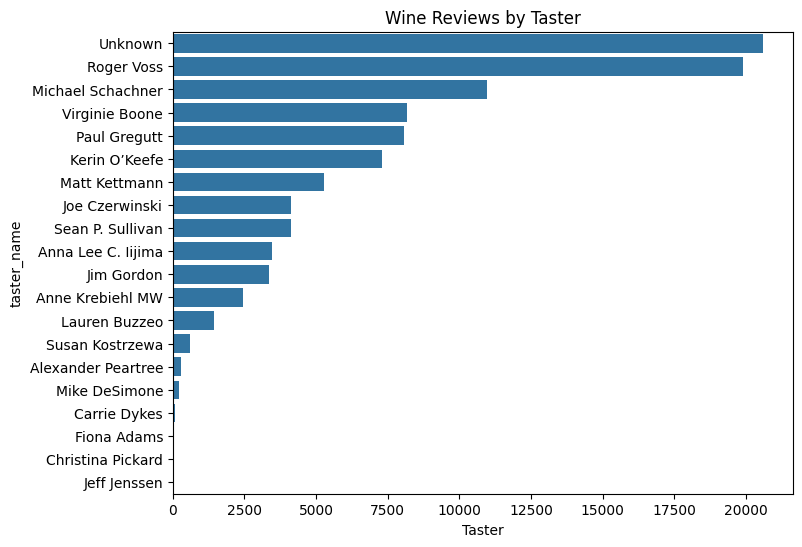

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(wine_df.taster_name.value_counts().sort_values(ascending=False).reset_index(), x='count', y='taster_name')
ax.set_title('Wine Reviews by Taster')
ax.set_xlabel('Number of Reviews')
ax.set_xlabel('Taster')
plt.show()

## Multivariate Analysis

### Price-Point relationship

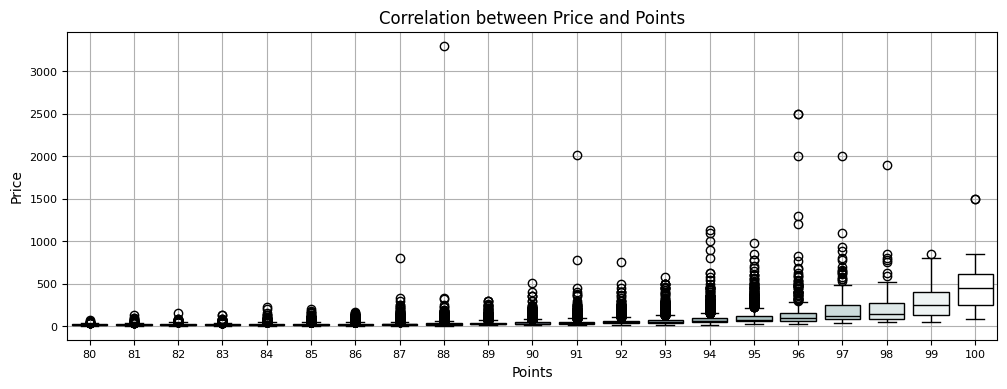

In [19]:
plt.figure(figsize=(12,4))
sns.boxplot(x = 'points', y = 'price', palette = 'bone', hue='points', data = wine_df, native_scale=False, legend=None)
plt.title("Correlation between Price and Points", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Price",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.show()

In [20]:
wine_corr = wine_df.select_dtypes(np.number).corr()
wine_corr

,points,price,year
points,1.000000,0.415175,0.056715
price,0.415175,1.000000,-0.073364
year,0.056715,-0.073364,1.000000


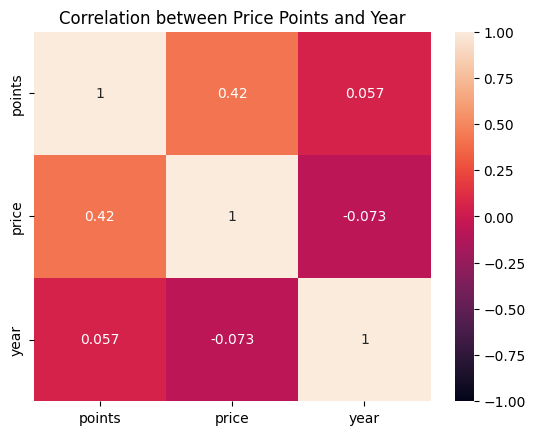

In [21]:
sns.heatmap(wine_corr, annot=True, vmin=-1.0, vmax=1.0)
plt.title("Correlation between Price Points and Year", fontsize=12)
plt.show()

There is a clear relationship between the points a wine gets, and the expected price for the wine. However the age of win appears to be weekly correlated to points or price.

### Taster-Point relationship

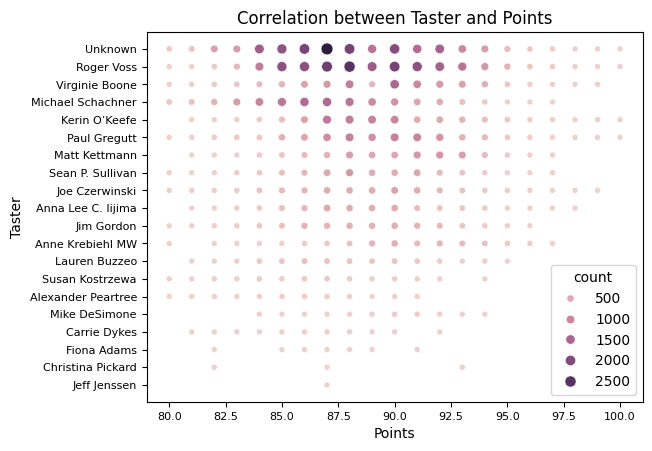

In [22]:
sns.scatterplot(wine_df.groupby(['taster_name', 'points'])[['title']].count().reset_index().rename(columns={'title': 'count'}).sort_values('count', ascending=False), x='points', y='taster_name', size='count', hue='count')
plt.title("Correlation between Taster and Points", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Taster",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Most wines reviewed are mid-range between 85 and 90 points as expected. Most reviewers span broad range of points. Does not appear to be bias from reviewer.

### Country-Price-Point relationship

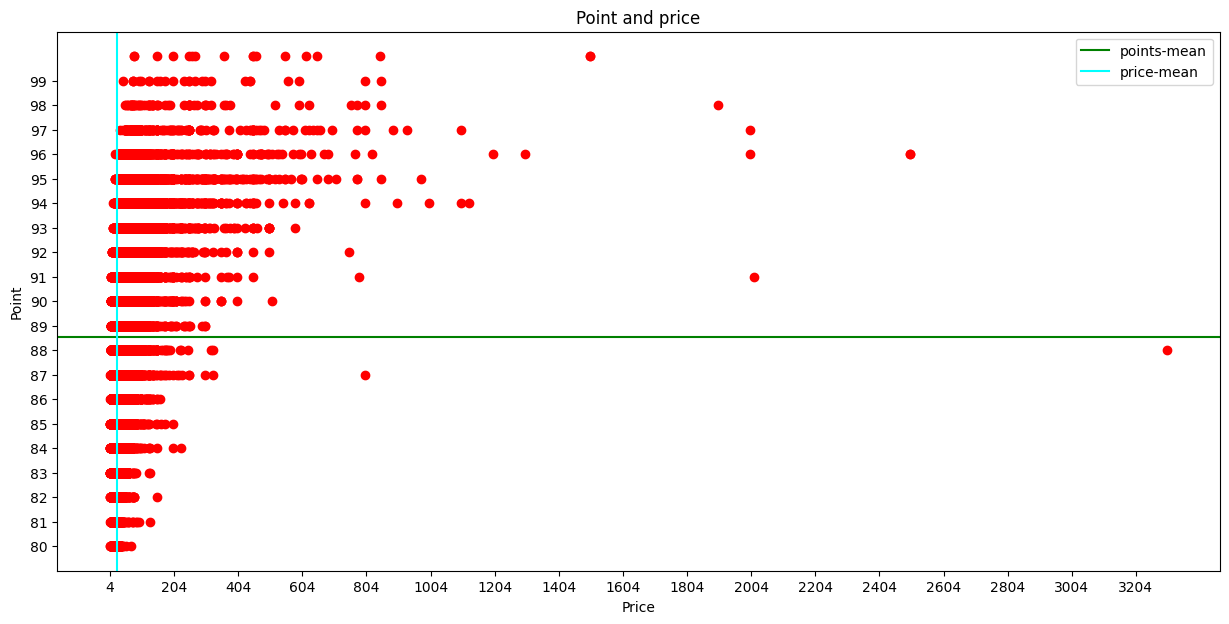

In [23]:
# get points and price columns
points_and_price = wine_df[['points', 'price']]

# mean of points and price
points_mean = points_and_price['points'].mean()
price_mean = points_and_price['price'].median()

# min and max of points
points_min = points_and_price['points'].min()
points_max = points_and_price['points'].max()

# min and max of price
price_min = points_and_price['price'].min()
price_max = points_and_price['price'].max()

# plot scatter chart on points & price
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(points_and_price['price'], points_and_price['points'], color='red')
ax.set_title('Point and price')
ax.set_xlabel('Price')
ax.set_ylabel('Point')
ax.set_xticks(np.arange(price_min, price_max, 200.0))
ax.set_yticks(np.arange(points_min, points_max, 1))
points_mean_line = ax.axhline(points_mean, color='green')
price_mean_line = ax.axvline(price_mean, color='cyan')
ax.legend([points_mean_line, price_mean_line],
          ['points-mean', 'price-mean'])
plt.show()

**Mean Price and Points vs total volume of reviews by country**

In [24]:
by_country_stats = wine_df.groupby('country')[['price', 'points']].mean().sort_index()
by_country_stats['count'] = wine_df.country.value_counts().sort_index().values
by_country_stats

,price,points,count
country,,,
Argentina,25.246274,86.745315,2988
Australia,35.851359,88.595186,1828
Austria,31.823690,90.373339,2183
Canada,33.643243,89.333333,186
Chile,20.604975,86.459181,3785
France,42.106180,88.883563,17692
Germany,43.848260,90.012856,1789
Greece,24.345029,87.080000,175
Israel,31.764858,88.493703,397


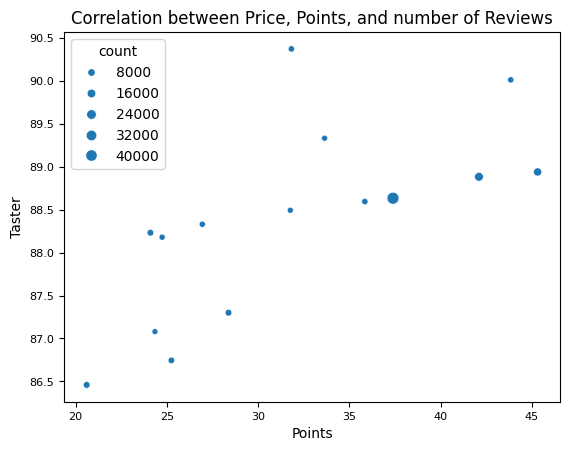

In [25]:
sns.scatterplot(by_country_stats.reset_index(), x='price', y='points', size='count')
plt.title("Correlation between Price, Points, and number of Reviews", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Taster",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**Distribution of points by country and wine type**

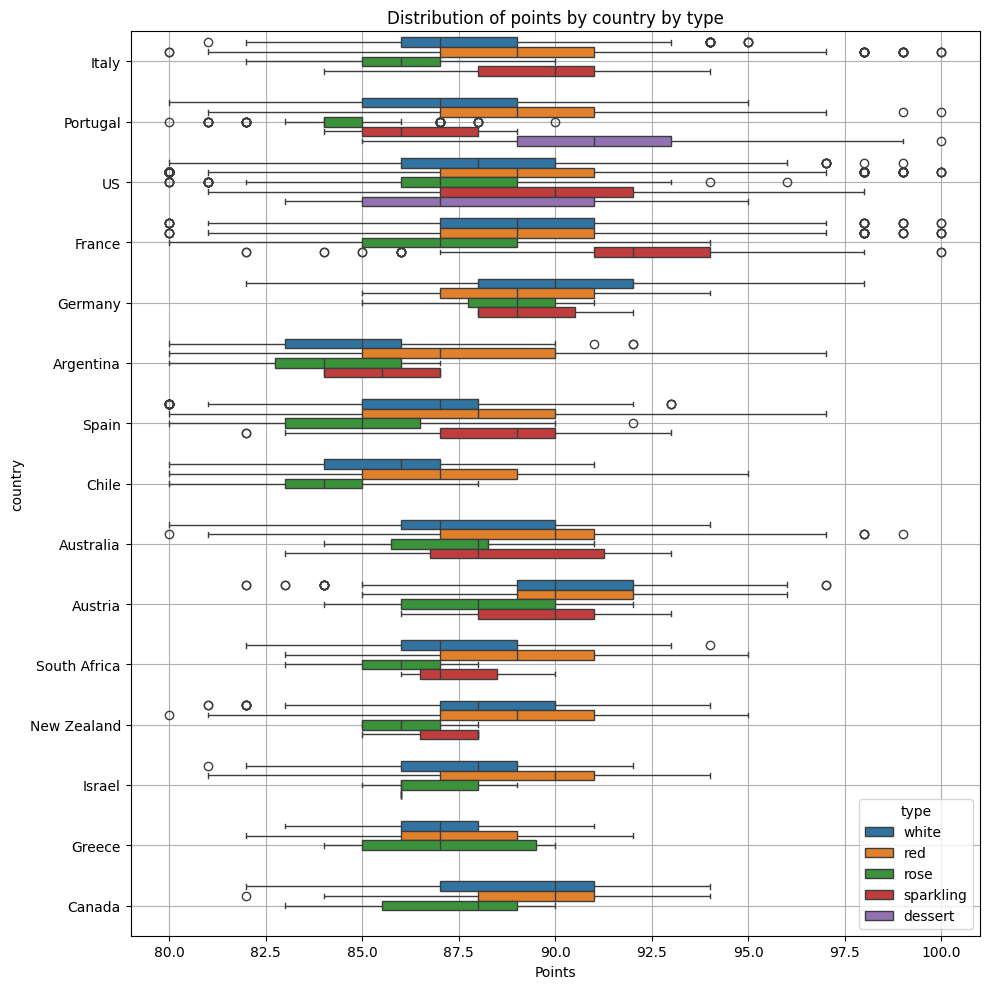

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(wine_df, x='points', y='country', orient='h', native_scale=True, hue='type')
ax.set_title('Distribution of points by country by type')
ax.set_xlabel('Points')
plt.grid()
plt.tight_layout()
plt.show()

**Feature Correlation**

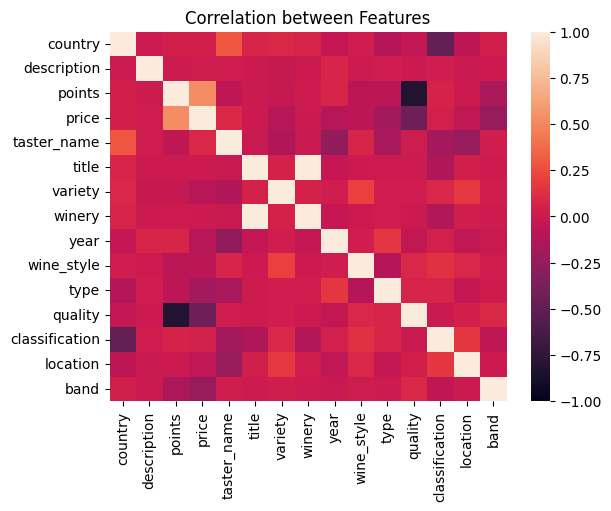

In [27]:
#make all columns categorical
selected_wine_data = pd.DataFrame({col: wine_df.dropna()[col].astype('category').cat.codes for col in wine_df.dropna()}, index=wine_df.dropna().index)

#create correlations and correlation heat map
corr= selected_wine_data.corr(method = 'pearson')
sns.heatmap(corr, vmin=-1, vmax=1)
plt.title("Correlation between Features", fontsize=12)
plt.show()

**Country-Points-Price Relationship**

In [28]:
top_5_countries = wine_df.country.value_counts().sort_values(ascending=False).iloc[:5].index.to_numpy()
top_5_countries

array(['US', 'France', 'Italy', 'Spain', 'Portugal'], dtype=object)

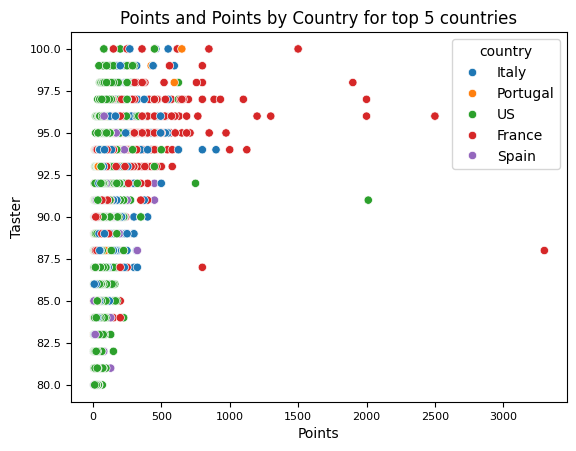

In [29]:
sns.scatterplot(wine_df[wine_df.country.isin(top_5_countries)], x='price', y='points', hue='country')
plt.title("Points and Points by Country for top 5 countries", fontsize=12)
plt.xlabel("Points",fontsize=10)
plt.ylabel("Taster",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Next
- [NLP preprocessing](wine_review-preprocess.ipynb)